<a href="https://colab.research.google.com/github/HenryLimaa/JPasEDR-Gaia/blob/master/Fotometria_Estrelas_Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Fotometria de Estrelas
### Este notebook lê um arquivo CSV contendo dados de fotometria de estrelas e visualiza as 10 primeiras fotometrias como gráficos de linhas.

### 1. Importação das Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

### 2. Leitura do Arquivo CSV

In [ ]:
# Carregamos o arquivo CSV em um DataFrame do Pandas.

df = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/Conjunto de dados(crossmating JPASEDR-GAIA).csv')

# Contar o número de linhas (excluindo o cabeçalho)
numero_estrelas = len(df)
print(f"O número total de estrelas é: {numero_estrelas}")

O número total de estrelas é: 17378


### 3. Visualização dos Dados

#### Exibição das Primeiras Linhas do DataFrame

O objetivo deste item é exibir as primeiras linhas do DataFrame para entender sua estrutura. O DataFrame contém colunas como `TILE_ID`, `NUMBER`, `MAG_APER_COR_3_0`, `Pk`, `e_Pk` e `erro_relativo_paralaxe`. A coluna `MAG_APER_COR_3_0` contém múltiplos valores de fotometria em diferentes bandas/momentos.

In [ ]:
#Exibimos as primeiras linhas do DataFrame para entender sua estrutura.
print("Primeiras linhas do DataFrame:")
df.head()

Primeiras linhas do DataFrame:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584


### 4. Pré-processamento dos Dados

Neste item, a coluna `MAG_APER_COR_3_0` é dividida em 57 colunas separadas, cada uma contendo um valor de fotometria. Isso é feito usando o método `str.split(expand=True)`, que divide a string em múltiplas colunas com base nos espaços. Após a divisão, os valores são convertidos para numéricos usando `pd.to_numeric`.

O DataFrame resultante tem 63 colunas, incluindo as novas colunas de fotometria (`Fotometria_1`, `Fotometria_2`, etc.). Esse pré-processamento é crucial para análises posteriores, pois permite que cada valor de fotometria seja tratado individualmente.

In [ ]:
#A coluna `MAG_APER_COR_3_0` contém múltiplos valores separados por espaços. Vamos dividi-la em 57 colunas separadas.
#Criamos uma lista de nomes para as novas colunas.

colunas_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

In [ ]:
# Verificar as colunas do DataFrame
print("Colunas do DataFrame:")
print(df.columns)

Colunas do DataFrame:
Index(['TILE_ID', 'NUMBER', 'MAG_APER_COR_3_0', 'Plx', 'e_Plx',
       'erro_relativo_paralaxe'],
      dtype='object')


In [ ]:
#Dividimos a coluna `MAG_APER_COR_3_0` em 57 colunas.
df[colunas_fotometria] = df['MAG_APER_COR_3_0'].str.split(expand=True)

In [ ]:
#Convertemos os valores para numéricos.
df[colunas_fotometria] = df[colunas_fotometria].apply(pd.to_numeric)

In [ ]:
#Exibimos as primeiras linhas após o pré-processamento.

print("\nDataFrame após divisão da coluna de fotometria:")
df.head()


DataFrame após divisão da coluna de fotometria:


,TILE_ID,NUMBER,MAG_APER_COR_3_0,Plx,e_Plx,erro_relativo_paralaxe,Fotometria_1,Fotometria_2,Fotometria_3,Fotometria_4,...,Fotometria_48,Fotometria_49,Fotometria_50,Fotometria_51,Fotometria_52,Fotometria_53,Fotometria_54,Fotometria_55,Fotometria_56,Fotometria_57
0,8955,46387,19.486 19.452 19.321 18.547 18.116 18.090 17.9...,1.2200,0.1069,8.762295,19.486,19.452,19.321,18.547,...,15.617,15.629,15.582,15.579,15.532,15.529,15.513,15.501,15.482,15.728
1,9654,7,16.411 15.355 15.111 14.844 14.849 14.749 14.8...,0.0947,0.0181,19.112989,16.411,15.355,15.111,14.844,...,15.044,15.070,15.032,15.025,14.997,14.977,14.991,14.961,15.025,14.975
2,9654,10,16.613 16.271 16.203 15.600 15.330 15.297 15.2...,1.2176,0.0145,1.190867,16.613,16.271,16.203,15.600,...,14.098,14.124,14.112,14.095,14.058,14.041,14.049,14.061,14.072,14.107
3,9654,12,16.923 16.331 16.340 16.033 15.814 15.788 15.8...,0.5735,0.0212,3.696600,16.923,16.331,16.340,16.033,...,14.982,14.994,14.994,14.981,14.951,14.938,14.954,14.957,14.958,14.990
4,9654,15,16.243 16.076 16.075 15.671 15.410 15.390 15.4...,0.7961,0.0181,2.273584,16.243,16.076,16.075,15.671,...,14.477,14.494,14.489,14.476,14.438,14.432,14.443,14.446,14.451,14.480


### 5. Visualização das 10 Primeiras Fotometrias

O objetivo deste item é visualizar as magnitudes fotométricas das 10 primeiras estrelas em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

In [ ]:
#Vamos plotar as 10 primeiras fotometrias como gráficos de linhas.
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

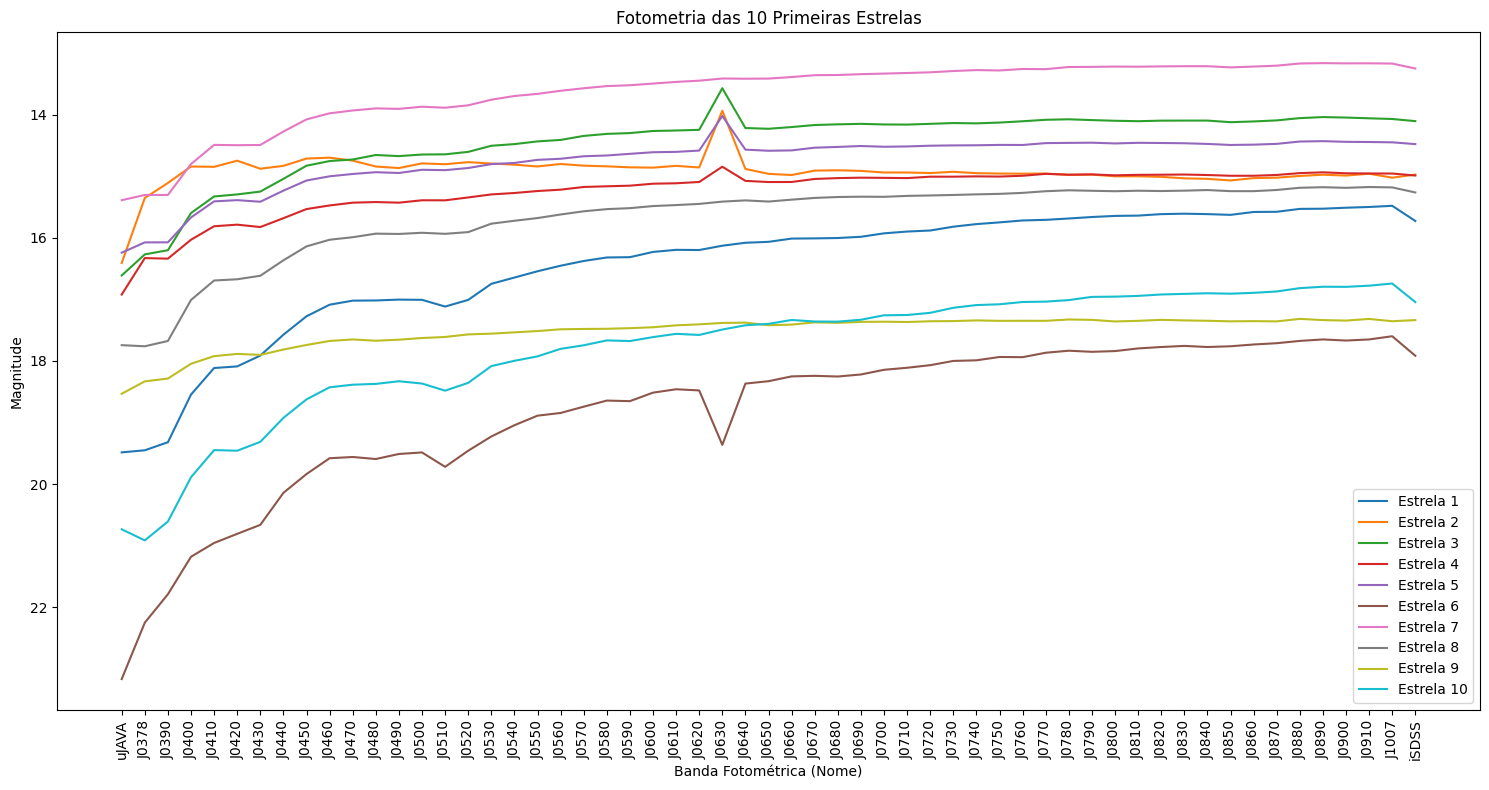

In [ ]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/drive/MyDrive/Notebook fotometrias/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

#Loop para plotar as 10 primeiras estrelas.

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 primeiras estrelas
for i in range(10):
    plt.plot(filter_names, df.loc[i, columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria das 10 Primeiras Estrelas')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### 6. Visualização de 10 Fotometrias de estrelas aleatórias

O objetivo deste item é visualizar as magnitudes fotométricas de 10 estrelas aleatórias em todas as 57 bandas fotométricas. A visualização é feita por meio de gráficos de linhas, onde cada linha representa uma estrela e o eixo X representa as bandas fotométricas (pelo seus respectivos nomes).

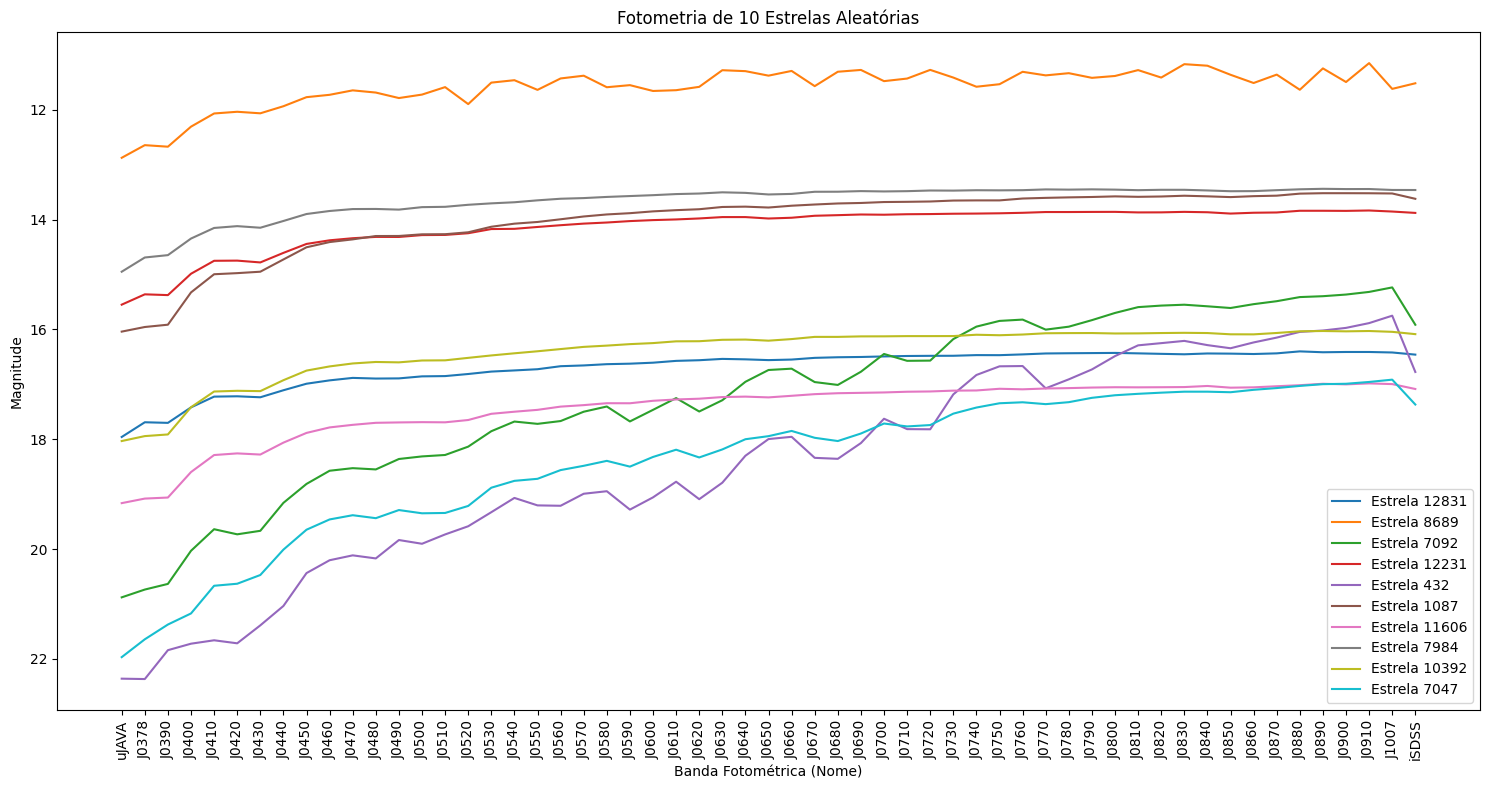

In [ ]:
# Carregar o arquivo CSV
df_filters = pd.read_csv('/content/804024.csv')

# Extrair os nomes das bandas fotométricas
filter_names = df_filters['name'].tolist()

# Supondo que df seja o DataFrame que contém as magnitudes das estrelas
# e que as colunas de fotometria sejam nomeadas como 'Fotometria_1', 'Fotometria_2', ..., 'Fotometria_57'
columns_fotometria = [f'Fotometria_{i+1}' for i in range(57)]

# Selecionar 10 estrelas aleatórias
random_stars = df.sample(n=10, random_state=42)  # random_state para reprodutibilidade

# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 estrelas aleatórias
for i, row in random_stars.iterrows():
    plt.plot(filter_names, row[columns_fotometria], label=f'Estrela {i+1}')

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)')
plt.ylabel('Magnitude')
plt.title('Fotometria de 10 Estrelas Aleatórias')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Análise dos Resultados

1. **Estrutura do Gráfico**:
   - O eixo X representa as **57 bandas fotométricas**, numeradas de 1 a 57.
   - O eixo Y representa as **magnitudes** das estrelas em cada banda fotométrica.
   - Cada linha no gráfico corresponde a uma das 10 primeiras estrelas do DataFrame.

2. **Legibilidade do Eixo X**:
   - Os rótulos do eixo X foram simplificados para mostrar apenas os números de 1 a 57, em vez dos nomes completos das colunas (como "Fotometria_1", "Fotometria_2", etc.).
   - Os rótulos foram rotacionados em 90 graus (`rotation=90`) para evitar sobreposição, garantindo que todos os números sejam visíveis.

3. **Comportamento das Curvas**:
   - Cada curva no gráfico mostra como a magnitude de uma estrela varia ao longo das 57 bandas fotométricas.
   - Estrelas com magnitudes mais baixas (valores menores no eixo Y) são mais brilhantes, enquanto magnitudes mais altas indicam estrelas mais fracas.
   - Se houver padrões semelhantes entre as curvas, isso pode indicar que as estrelas têm propriedades fotométricas semelhantes (por exemplo, pertencerem à mesma classe espectral ou estágio evolutivo).

4. **Legenda**:
   - A legenda identifica cada estrela pelo número correspondente (de 1 a 10).
   - Isso permite comparar facilmente o comportamento fotométrico de cada estrela.

5. **Melhorias na Visualização**:
   - O uso de `plt.tight_layout()` garante que o gráfico seja renderizado sem sobreposição de elementos.
   - O tamanho da figura (`figsize=(15, 8)`) foi aumentado para acomodar melhor os 57 rótulos no eixo X.


#### **Interpretação dos Dados**

- **Variação nas Magnitudes**:
  - Se as curvas das estrelas forem semelhantes, isso sugere que as estrelas têm propriedades fotométricas parecidas.
  - Se houver grandes diferenças entre as curvas, isso pode indicar que as estrelas têm características distintas (como temperaturas diferentes, estágios evolutivos diferentes ou presença de poeira interestelar).

- **Picos ou Vales**:
  - Picos (aumentos repentinos na magnitude) ou vales (quedas repentinas) podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão.

- **Comparação entre Estrelas**:
  - Estrelas com magnitudes consistentemente mais baixas (mais brilhantes) em todas as bandas podem ser estrelas mais próximas ou intrinsecamente mais luminosas.
  - Estrelas com magnitudes mais altas (mais fracas) podem ser estrelas mais distantes ou menos luminosas.

#### **Conclusão**

O gráfico fornece uma visão clara do comportamento fotométrico das 10 primeiras estrelas ao longo das 57 bandas fotométricas. A partir da análise, podemos inferir:

1. **Propriedades Físicas**:
   - As diferenças nas magnitudes ao longo das bandas fotométricas podem ser usadas para inferir propriedades como temperatura, luminosidade e composição química das estrelas.

2. **Classificação Estelar**:
   - Estrelas com curvas semelhantes podem pertencer à mesma classe espectral ou estágio evolutivo.

3. **Anomalias**:
   - Picos ou vales nas curvas podem indicar a presença de características espectrais específicas, como linhas de absorção ou emissão, que podem ser investigadas em análises mais detalhadas.

### 7. Normalização dos dados

#### 7.1. Identificar as Bandas Jxxx e iSDSS

In [ ]:
# Encontrar índices das bandas J (ex: J0378, J0395, etc.) e iSDSS
bandas_j = [i for i, nome in enumerate(filter_names) if nome.startswith('J')]
banda_i = [i for i, nome in enumerate(filter_names) if 'iSDSS' in nome][0]  # Assume que existe exatamente uma banda iSDSS

print("Bandas J disponíveis:", [filter_names[i] for i in bandas_j])
print("Banda iSDSS usada para normalização:", filter_names[banda_i])

Bandas J disponíveis: ['J0378', 'J0390', 'J0400', 'J0410', 'J0420', 'J0430', 'J0440', 'J0450', 'J0460', 'J0470', 'J0480', 'J0490', 'J0500', 'J0510', 'J0520', 'J0530', 'J0540', 'J0550', 'J0560', 'J0570', 'J0580', 'J0590', 'J0600', 'J0610', 'J0620', 'J0630', 'J0640', 'J0650', 'J0660', 'J0670', 'J0680', 'J0690', 'J0700', 'J0710', 'J0720', 'J0730', 'J0740', 'J0750', 'J0760', 'J0770', 'J0780', 'J0790', 'J0800', 'J0810', 'J0820', 'J0830', 'J0840', 'J0850', 'J0860', 'J0870', 'J0880', 'J0890', 'J0900', 'J0910', 'J1007']
Banda iSDSS usada para normalização: iSDSS


#### 7.2 . Calcular Cores Jxxx - iSDSS para Todas as Bandas

Subtrair o valor de iSDSS de todas as bandas de cada estrela:

In [ ]:
# Criar DataFrame para cores normalizadas (Jxxx - iSDSS)
cores_normalizadas = pd.DataFrame()

for i in range(57):  # 57 bandas fotométricas
    nome_banda = filter_names[i]
    cores_normalizadas[nome_banda] = df[f'Fotometria_{i+1}'] - df[f'Fotometria_{banda_i+1}']  # Subtrai iSDSS

# Visualizar as primeiras linhas
print("\nDataFrame de cores normalizadas (Jxxx - iSDSS):")
print(cores_normalizadas.head())


DataFrame de cores normalizadas (Jxxx - iSDSS):
   uJAVA  J0378  J0390  J0400  J0410  J0420  J0430  J0440  J0450  J0460  ...  \
0  3.758  3.724  3.593  2.819  2.388  2.362  2.186  1.847  1.548  1.360  ...   
1  1.436  0.380  0.136 -0.131 -0.126 -0.226 -0.095 -0.142 -0.260 -0.275  ...   
2  2.506  2.164  2.096  1.493  1.223  1.190  1.144  0.937  0.724  0.648  ...   
3  1.933  1.341  1.350  1.043  0.824  0.798  0.837  0.693  0.545  0.486  ...   
4  1.763  1.596  1.595  1.191  0.930  0.910  0.936  0.756  0.591  0.523  ...   

   J0840  J0850  J0860  J0870  J0880  J0890  J0900  J0910  J1007  iSDSS  
0 -0.111 -0.099 -0.146 -0.149 -0.196 -0.199 -0.215 -0.227 -0.246    0.0  
1  0.069  0.095  0.057  0.050  0.022  0.002  0.016 -0.014  0.050    0.0  
2 -0.009  0.017  0.005 -0.012 -0.049 -0.066 -0.058 -0.046 -0.035    0.0  
3 -0.008  0.004  0.004 -0.009 -0.039 -0.052 -0.036 -0.033 -0.032    0.0  
4 -0.003  0.014  0.009 -0.004 -0.042 -0.048 -0.037 -0.034 -0.029    0.0  

[5 rows x 57 columns]


#### 7.3. Calcular Cores Normalizadas (Jxxx - iSDSS)

In [ ]:
# Encontrar o índice da banda iSDSS
banda_i = [i for i, nome in enumerate(filter_names) if 'iSDSS' in nome][0]  # Assume que existe exatamente uma banda iSDSS

# Calcular cores normalizadas (Jxxx - iSDSS) para todas as bandas
cores_normalizadas = pd.DataFrame()
for i in range(57):
    nome_banda = filter_names[i]
    cores_normalizadas[nome_banda] = df[f'Fotometria_{i+1}'] - df[f'Fotometria_{banda_i+1}']

#### 7.4. Plotar as 10 Primeiras Estrelas (Normalizadas)

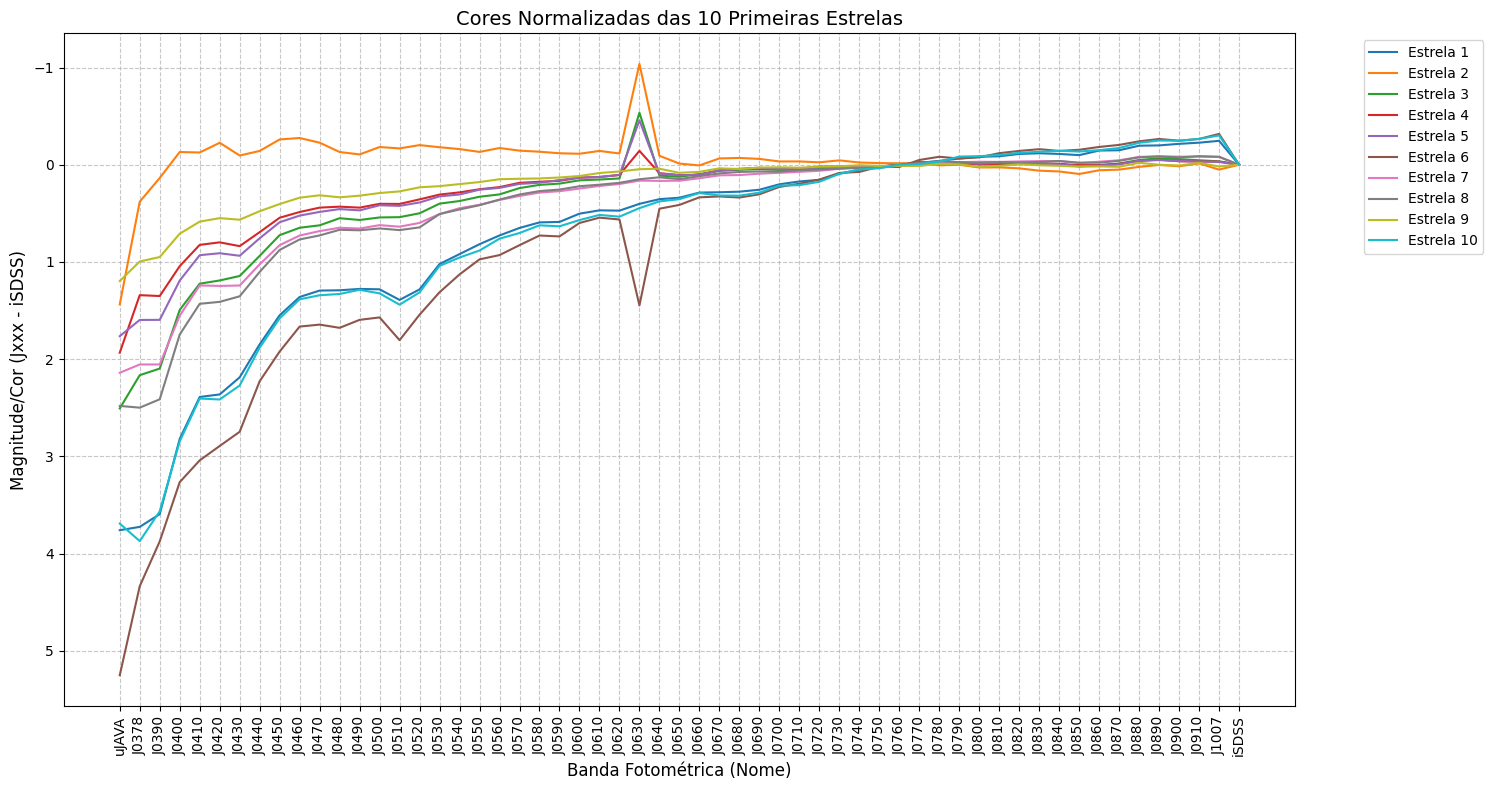

In [ ]:
# Criar a figura
plt.figure(figsize=(15, 8))

# Plotar as 10 primeiras estrelas
for i in range(10):
    plt.plot(filter_names, cores_normalizadas.iloc[i], label=f'Estrela {i+1}')

# Configurações do gráfico

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)', fontsize=12)
plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)', fontsize=12)
plt.title('Cores Normalizadas das 10 Primeiras Estrelas', fontsize=14)
plt.xticks(rotation=90) # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#### 7.5.  Plotar 10 Estrelas Aleatórias (Normalizadas)

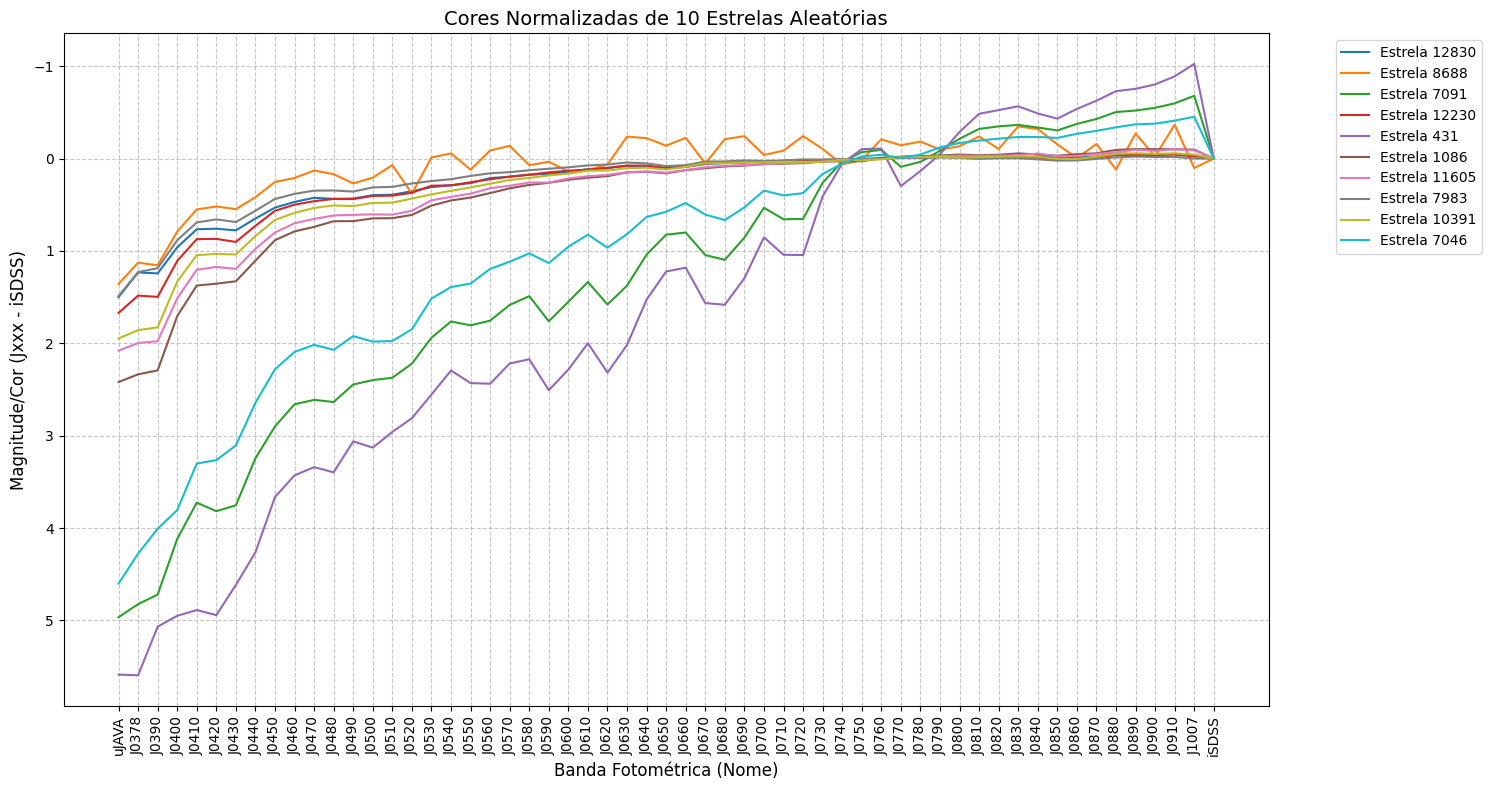

In [ ]:
# Selecionar 10 estrelas aleatórias (com seed para reprodutibilidade)
np.random.seed(42)
indices_aleatorios = np.random.choice(len(df), 10, replace=False)
estrelas_aleatorias = cores_normalizadas.iloc[indices_aleatorios]

plt.figure(figsize=(15, 8))

# Plotar as estrelas aleatórias
for idx, row in estrelas_aleatorias.iterrows():
    plt.plot(filter_names, row, label=f'Estrela {idx}')

# Configurações do gráfico

# Configurações do eixo X
plt.xlabel('Banda Fotométrica (Nome)', fontsize=12)
plt.ylabel('Magnitude/Cor (Jxxx - iSDSS)', fontsize=12)
plt.title('Cores Normalizadas de 10 Estrelas Aleatórias', fontsize=14)
plt.xticks(rotation=90) # Rotaciona os rótulos do eixo X para melhor visualização

# Invertendo o eixo Y para valores decrescentes
plt.gca().invert_yaxis()

# Adicionando a legenda e ajustando o layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#### 7.6.  Bandas com maior variação de cor

In [ ]:
# Bandas com maior variação de cor
print("\nBandas com maior variação de cor:")
print(cores_normalizadas.std().sort_values(ascending=False).head(56))


Bandas com maior variação de cor:
uJAVA    1.499447
J0378    1.481042
J0390    1.391250
J0400    1.280781
J0420    1.276017
J0410    1.229675
J0430    1.206919
J0440    1.070757
J0450    0.956860
J0480    0.900474
J0460    0.884357
J0470    0.866819
J0500    0.825437
J0510    0.818613
J0490    0.816954
J0520    0.758479
J0530    0.662663
J0590    0.646354
J0550    0.633126
J0560    0.631868
J0540    0.608612
J0620    0.597839
J0600    0.571773
J0570    0.569208
J0580    0.534082
J0630    0.526652
J0610    0.505259
J0680    0.429909
J0640    0.406150
J0670    0.402749
J0690    0.350382
J0650    0.300528
J0660    0.293095
J1007    0.283979
J0710    0.268129
J0720    0.264634
J0910    0.228349
J0700    0.214687
J0880    0.212473
J0900    0.209039
J0860    0.208934
J0890    0.196301
J0810    0.188941
J0870    0.176730
J0820    0.162841
J0800    0.149458
J0830    0.148301
J0760    0.141268
J0850    0.137386
J0840    0.137384
J0790    0.124103
J0780    0.123671
J0730    0.120412
J0770    0.

### 8. Criando arquivo CSV dos dados normalizados

#### 8.1. Primeiras 10 estrelas

In [ ]:
# filter_names - lista com os nomes das bandas fotométricas
# cores_normalizadas - DataFrame com os valores normalizados

# Criar o arquivo CSV
# Primeiro vamos preparar os dados para exportação
dados_exportacao = cores_normalizadas.head(10).copy()  # Pegando as 10 primeiras estrelas
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['Estrela'] = [f'Estrela {i+1}' for i in range(10)]  # Adicionando coluna de identificação

# Reorganizando as colunas para ter 'Estrela' primeiro
colunas = ['Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_estrelas.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso!')

Arquivo cores_normalizadas_estrelas.csv criado com sucesso!


### 8.2. 10 estrelas aleatórias

In [ ]:
# 1. Selecionar 10 estrelas aleatórias (com seed para reprodutibilidade)
np.random.seed(42)
indices_aleatorios = np.random.choice(len(df), 10, replace=False)
estrelas_aleatorias = cores_normalizadas.iloc[indices_aleatorios]

# 2. Criar o arquivo CSV com os dados das estrelas aleatórias
# Preparar os dados para exportação
dados_exportacao = estrelas_aleatorias.copy()
dados_exportacao.columns = filter_names  # Usando os nomes das bandas como colunas
dados_exportacao['ID_Estrela'] = indices_aleatorios  # Adicionando coluna com os IDs originais

# Reorganizando as colunas para ter 'ID_Estrela' primeiro
colunas = ['ID_Estrela'] + filter_names
dados_exportacao = dados_exportacao[colunas]

# Exportando para CSV
nome_arquivo = 'cores_normalizadas_estrelas_aleatorias.csv'
dados_exportacao.to_csv(nome_arquivo, index=False)
print(f'Arquivo {nome_arquivo} criado com sucesso!')

Arquivo cores_normalizadas_estrelas_aleatorias.csv criado com sucesso!


### 9. Rede SOM

#### 9.1 Usando as 10 primeiras estrelas

#### 9.2. Usando 10 estrelas aleatórias